#Setup Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import ast
import os
import pandas as pd

Mounted at /content/drive


# Reading preprocessed data

In [ ]:
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /preprocessed_data/')

df_query_list = pd.read_pickle('cleaned_ground_truth.pkl')
df_expanded_query_list = pd.read_pickle("cleaned_extended_ground_truth.pkl")
# df_query_list.head
df_civil_code_list = pd.read_pickle('cleaned_civil_code.pkl')
# df_civil_code_list.head
dataset_query_tokens = df_expanded_query_list['Query_tokens']
dataset_query_lemmas = df_query_list['Query_lemma']

dataset_expanded_query_tokens = df_expanded_query_list['Expanded_query_tokens']
dataset_expanded_query_lemmas = df_expanded_query_list['Expanded_query_lemma']

dataset_article_tokens = df_civil_code_list['Article_description_tokens']
dataset_article_lemmas = df_civil_code_list['Article_description_lemmas']
import re
def change_hyphen(article_number):
  return re.sub('_','-',article_number)
def remmove_space(article_number):
  return re.sub(' ','',article_number)
df_civil_code_list['Article_number']= df_civil_code_list['Article_number'].apply(change_hyphen)
df_civil_code_list['Article_number']= df_civil_code_list['Article_number'].apply(remmove_space)

In [ ]:
dataset_expanded_query_bi_tri_grams = df_expanded_query_list['Expanded_query_bi_tri_grams']
dataset_combined_articles_lemma_bi_tri_grams = df_civil_code_list['Combined_lemma_Bi_tri']

In [ ]:
df_civil_code_list['Article_bi_tri_grams']

1      [fundamental_principle, principle_article_1, a...
2      [standard_construction, construction_article_2...
3      [article_3, 3_1, 1_enjoyment, enjoyment_privat...
4      [article_3, 3_2, 2_person, person_make, make_j...
5      [age_majority, majority_article_4, article_4_a...
                             ...                        
772    [fetus_capacity, capacity_hold, hold_right, ri...
773    [method_compensation, compensation_loss, loss_...
774    [recovery_defamation, defamation_article_723, ...
775    [extinctive_prescription, prescription_claim, ...
776    [extinctive_prescription, prescription_claim, ...
Name: Article_bi_tri_grams, Length: 776, dtype: object

In [ ]:
df_expanded_query_list.head().T

,0,1,2,3,4
ID,H21-1-1,H21-1-2,H21-1-3,H21-1-4,H21-1-5
Query,Acceptance made by a minor that received an o...,"If a minor, after getting permission for carr...",The purchase of daily household items may not...,"If a person under curatorship performs, witho...",The person in question may not request a com...
Article_numbers,[5],[6],[9],"[13, 120, 122]","[7, 11]"
Query_tokens,"[acceptance, made, minor, received, offer, gif...","[minor, getting, permission, carrying, busines...","[purchase, daily, household, items, may, not, ...","[person, curatorship, performs, without, getti...","[person, question, may, not, request, commence..."
Query_lemma,"[acceptance, make, minor, receive, offer, gift...","[minor, get, permission, carry, business, stat...","[purchase, daily, household, item, may, not, r...","[person, curatorship, perform, without, get, c...","[person, question, may, not, request, commence..."
Query_pos,"[NOUN, VERB, NOUN, VERB, NOUN, NOUN, ADP, NOUN...","[ADJ, VERB, NOUN, VERB, NOUN, ADJ, NOUN, VERB,...","[NOUN, ADJ, NOUN, NOUN, VERB, ADV, VERB, ADV, ...","[NOUN, NOUN, NOUN, ADP, VERB, NOUN, NOUN, VERB...","[NOUN, NOUN, VERB, ADV, VERB, NOUN, NOUN, VERB..."
Expanded_query_tokens,"[nipper, not, establish, rescinded, youngster,...","[nipper, not, bear, rescinded, youngster, smal...","[Mrs._Humphrey_Ward, not, day_by_day, househol...","[not, sire, turn, consent, pay_back, deed, aim...","[somebody, keeping, not, call_for, doubt, quer..."
Expanded_query_lemma,"[nipper, not, establish, youngster, sire, tale...","[nipper, not, bear, youngster, small, sire, ki...","[Mrs._Humphrey_Ward, not, day_by_day, househol...","[not, sire, turn, consent, pay_back, deed, aim...","[somebody, keeping, not, call_for, doubt, quer..."
Query_bigrams,"[acceptance_make, make_minor, minor_receive, r...","[minor_get, get_permission, permission_carry, ...","[purchase_daily, daily_household, household_it...","[person_curatorship, curatorship_perform, perf...","[person_question, question_may, may_not, not_r..."
Query_trigrams,"[acceptance_make_minor, make_minor_receive, mi...","[minor_get_permission, get_permission_carry, p...","[purchase_daily_household, daily_household_ite...","[person_curatorship_perform, curatorship_perfo...","[person_question_may, question_may_not, may_no..."


In [ ]:
df_civil_code_list.head().T

,1,2,3,4,5
Article_number,1,2,3,3-2,4
Referenced_article_num,{},{},{},{},{}
Article_description,(Fundamental Principles) Article_1 (1) Privat...,(Standards for Construction) Article_2 This C...,Article 3 (1) The enjoyment of private rights...,Article 3-2 If the person making a juridical ...,(Age of Majority) Article_4 The age of majori...
Article_titles,(Fundamental Principles),(Standards for Construction),(Standards for Construction),(Standards for Construction),(Age of Majority)
Article_description_tokens,"[fundamental, principles, article_1, 1, privat...","[standards, construction, article_2, code, mus...","[article, 3, 1, enjoyment, private, rights, co...","[article, 3, 2, person, making, juridical, act...","[age, majority, article_4, age, majority, 20, ..."
Article_description_lemmas,"[fundamental, principle, article_1, 1, private...","[standard, construction, article_2, code, must...","[article, 3, 1, enjoyment, private, right, com...","[article, 3, 2, person, make, juridical, act, ...","[age, majority, article_4, age, majority, 20, ..."
Article_description_pos,"[ADJ, NOUN, NOUN, NUM, ADJ, NOUN, VERB, ADJ, A...","[NOUN, NOUN, ADP, NOUN, VERB, VERB, VERB, NOUN...","[NOUN, NUM, PUNCT, NOUN, ADJ, NOUN, NOUN, NOUN...","[NOUN, NUM, NUM, NOUN, VERB, ADJ, NOUN, ADV, A...","[NOUN, NOUN, NOUN, NOUN, NOUN, NUM, NOUN, NOUN]"
Article_desc_bigrams,"[fundamental_principle, principle_article_1, a...","[standard_construction, construction_article_2...","[article_3, 3_1, 1_enjoyment, enjoyment_privat...","[article_3, 3_2, 2_person, person_make, make_j...","[age_majority, majority_article_4, article_4_a..."
Article_desc_trigrams,"[fundamental_principle_article_1, principle_ar...","[standard_construction_article_2, construction...","[article_3_1, 3_1_enjoyment, 1_enjoyment_priva...","[article_3_2, 3_2_person, 2_person_make, perso...","[age_majority_article_4, majority_article_4_ag..."
Article_bi_tri_grams,"[fundamental_principle, principle_article_1, a...","[standard_construction, construction_article_2...","[article_3, 3_1, 1_enjoyment, enjoyment_privat...","[article_3, 3_2, 2_person, person_make, make_j...","[age_majority, majority_article_4, article_4_a..."


In [ ]:
# df_query_list
df_expanded_query_list.head()

,ID,Query,Article_numbers,Query_tokens,Query_lemma,Query_pos,Expanded_query_tokens,Expanded_query_lemma,Query_bigrams,Query_trigrams,Query_bi_tri_grams,Expanded_query_bi_tri_grams,Articles,Article_tokens,Article_lemma,Article_pos,Article_titles,Article_title_tokens,Article_title_lemma,Article_title_pos,Article_bigrams,Article_trigrams
0,H21-1-1,Acceptance made by a minor that received an o...,[5],"[acceptance, made, minor, received, offer, gif...","[acceptance, make, minor, receive, offer, gift...","[NOUN, VERB, NOUN, VERB, NOUN, NOUN, ADP, NOUN...","[nipper, not, establish, rescinded, youngster,...","[nipper, not, establish, youngster, sire, tale...","[acceptance_make, make_minor, minor_receive, r...","[acceptance_make_minor, make_minor_receive, mi...","[acceptance_make, make_minor, minor_receive, r...","[nipper, not, establish, youngster, sire, tale...",\nArticle 5\n(1) A minor must obtain the conse...,"[['juridical', 'acts', 'minors', 'article_5', ...","[['juridical', 'act', 'minor', 'article_5', '1...","[['ADJ', 'NOUN', 'NOUN', 'INTJ', 'PUNCT', 'ADJ...","[['ADJ', 'NOUN', 'NOUN', 'INTJ', 'PUNCT', 'ADJ...","[['juridical', 'acts', 'minors']]","[['juridical', 'act', 'minor']]","[['ADJ', 'NOUN', 'NOUN']]","[[juridical_act, act_minor, minor_article_5, a...","[[juridical_act_minor, act_minor_article_5, mi..."
1,H21-1-2,"If a minor, after getting permission for carr...",[6],"[minor, getting, permission, carrying, busines...","[minor, get, permission, carry, business, stat...","[ADJ, VERB, NOUN, VERB, NOUN, ADJ, NOUN, VERB,...","[nipper, not, bear, rescinded, youngster, smal...","[nipper, not, bear, youngster, small, sire, ki...","[minor_get, get_permission, permission_carry, ...","[minor_get_permission, get_permission_carry, p...","[minor_get, get_permission, permission_carry, ...","[nipper, not, bear, youngster, small, sire, ki...",\nArticle 6\n(1) A minor who is permitted to c...,"[['permission', 'minors', 'conduct', 'business...","[['permission', 'minor', 'conduct', 'business'...","[['NOUN', 'NOUN', 'VERB', 'NOUN', 'X', 'PUNCT'...","[['NOUN', 'NOUN', 'VERB', 'NOUN', 'X', 'PUNCT'...","[['permission', 'minors', 'conduct', 'business']]","[['permission', 'minor', 'conduct', 'business']]","[['NOUN', 'NOUN', 'VERB', 'NOUN']]","[[permission_minor, minor_conduct, conduct_bus...","[[permission_minor_conduct, minor_conduct_busi..."
2,H21-1-3,The purchase of daily household items may not...,[9],"[purchase, daily, household, items, may, not, ...","[purchase, daily, household, item, may, not, r...","[NOUN, ADJ, NOUN, NOUN, VERB, ADV, VERB, ADV, ...","[Mrs._Humphrey_Ward, not, day_by_day, househol...","[Mrs._Humphrey_Ward, not, day_by_day, househol...","[purchase_daily, daily_household, household_it...","[purchase_daily_household, daily_household_ite...","[purchase_daily, daily_household, household_it...","[Mrs._Humphrey_Ward, not, day_by_day, househol...",\nArticle 9\nA juridical act performed by an a...,"[['juridical', 'acts', 'adult', 'wards', 'guar...","[['juridical', 'act', 'adult', 'ward', 'guardi...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADJ'...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADJ'...","[['juridical', 'acts', 'adult', 'wards', 'guar...","[['juridical', 'act', 'adult', 'ward', 'guardi...","[['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN']]","[[juridical_act, act_adult, adult_ward, ward_g...","[[juridical_act_adult, act_adult_ward, adult_w..."
3,H21-1-4,"If a person under curatorship performs, witho...","[13, 120, 122]","[person, curatorship, performs, without, getti...","[person, curatorship, perform, without, get, c...","[NOUN, NOUN, NOUN, ADP, VERB, NOUN, NOUN, VERB...","[not, sire, turn, consent, pay_back, deed, aim...","[not, sire, turn, consent, pay_back, deed, aim...","[person_curatorship, curatorship_perform, perf...","[person_curatorship_perform, curatorship_perfo...","[person_curatorship, curatorship_perform, perf...","[not, sire, turn, consent, pay_back, deed, aim...",\nArticle 13\n(1) A person under curatorship m...,

# Create article and query dataset

In [ ]:
#article corpus
dataset_article_lemmas.iloc[0]

lemma_articles = []
for i in range(len(df_civil_code_list)):
  line = []
  #line = ast.literal_eval(dataset_article_lemmas.iloc[i])
  line = df_civil_code_list['Article_description_lemmas'].iloc[i]
  lemma_articles.append(line)
token_articles = []
for i in range(len(df_civil_code_list)):
  line = []
  #line = ast.literal_eval(dataset_article_tokens.iloc[i])
  line = df_civil_code_list['Article_description_tokens'].iloc[i]
  token_articles.append(line)

In [ ]:
df_civil_code_list['Article_description_lemmas'].iloc[0]

['fundamental',
 'principle',
 'article_1',
 '1',
 'private',
 'right',
 'must',
 'congruent',
 'public',
 'welfare',
 '2',
 'exercise',
 'right',
 'performance',
 'duty',
 'must',
 'do',
 'good',
 'faith',
 '3',
 'abuse',
 'right',
 'not',
 'permit']

In [ ]:
#query corpus and ground truth
query_list = []
for line in range(len(dataset_expanded_query_lemmas)):
  q = []
  #q = ast.literal_eval(dataset_expanded_query_lemmas.iloc[line])
  q = df_expanded_query_list['Query_bigrams'].iloc[line]
  query_list.append(q)
ground_truth = []
for line in range(len(df_query_list)):
  l=[]
  #l=ast.literal_eval(df_query_list['Article_numbers'].iloc[line])
  l=df_expanded_query_list['Article_numbers'].iloc[line]
  ground_truth.append(l)


In [ ]:
query_list[2]

['purchase_daily',
 'daily_household',
 'household_item',
 'item_may',
 'may_not',
 'not_rescind',
 'rescind_even',
 'even_adult',
 'adult_ward',
 'ward_perform',
 'perform_act']

In [ ]:
sum = 0
for i in range(len(ground_truth)):
  sum += len(ground_truth[i])
print(sum)

901


In [ ]:
dataset_query_lemmas.iloc[0]

"['acceptance', 'make', 'minor', 'receive', 'offer', 'gift', 'without', 'burden', 'without', 'get', 'consent', 'statutory', 'agent', 'may', 'not', 'rescind']"

In [ ]:
#query relevence file
qrel_list = []
for i in range(len(df_expanded_query_list)):
  id = df_query_list['ID'].iloc[i]
  for j in range(len(ground_truth[i])):
    qrel_list.append(id+" "+"0"+" "+ground_truth[i][j]+" "+"1")
f= open("q_rel.txt","w+")
for i in range(len(qrel_list)):
  f.write(qrel_list[i]+"\n")
f.close() 
    

In [ ]:
for i in range(len(qrel_list)):
  print(qrel_list[i])

H21-1-1 0 5 1
H21-1-2 0 6 1
H21-1-3 0 9 1
H21-1-4 0 13 1
H21-1-4 0 120 1
H21-1-4 0 122 1
H21-1-5 0 7 1
H21-1-5 0 11 1
H21-3-1 0 189 1
H21-3-1 0 190 1
H21-3-2 0 575 1
H21-3-4 0 356 1
H21-3-5 0 89 1
H21-5-3 0 707 1
H21-5-4 0 119 1
H21-7-5 0 206 1
H21-8-A 0 181 1
H21-8-O 0 201 1
H21-9-1 0 184 1
H21-9-2 0 182 1
H21-9-3 0 181 1
H21-9-3 0 658 1
H21-9-4 0 183 1
H21-10-1 0 223 1
H21-10-1 0 224 1
H21-10-1 0 229 1
H21-10-2 0 234 1
H21-10-3 0 209 1
H21-10-5 0 213 1
H21-12-1 0 295 1
H21-12-2 0 295 1
H21-12-3 0 297 1
H21-13-A 0 313 1
H21-13-I 0 304 1
H21-13-U 0 343 1
H21-13-E 0 344 1
H21-13-E 0 345 1
H21-13-O 0 349 1
H21-15-3 0 388 1
H21-19-A 0 447 1
H21-19-I 0 453 1
H21-19-U 0 457 1
H21-19-E 0 459 1
H21-20-2 0 467 1
H21-20-4 0 468 1
H21-21-1 0 478 1
H21-21-1 0 479 1
H21-21-3 0 487 1
H21-21-4 0 481 1
H21-21-5 0 485 1
H21-22-5 0 508 1
H21-24-A 0 550 1
H21-24-I 0 643 1
H21-24-E 0 176 1
H21-24-E 0 177 1
H21-24-O 0 446 1
H21-25-3 0 702 1
H21-25-4 0 474 1
H21-25-5 0 462 1
H21-26-A 0 541 1
H21-26-A 0 542

In [ ]:
amounts = [0,0,0,0,0,0,0]
for i in range(len(ground_truth)):
  amounts[len(ground_truth[i])]+=1
print(amounts)

[0, 538, 121, 27, 6, 2, 1]


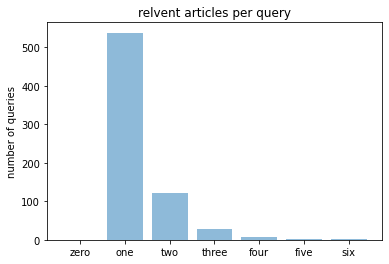

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
relevent_articles = ('zero','one','two','three','four','five','six')
y_pos = np.arange(len(relevent_articles))
plt.bar(y_pos, amounts, align='center', alpha=0.5)
plt.xticks(y_pos, relevent_articles)
plt.ylabel('number of queries')
plt.title('relvent articles per query')

plt.show()

# Tf-IDF Retreival Process

In [ ]:
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk 
nltk.download('punkt')
import pprint
from gensim import models

def retrieve_using_tfidf(corpus_data, query_list, ground_truth, top_n,threshold,top_100):
    """
    This function searches the most similar texts to the query.
        :param index: gensim.similarities object
        :param query: a string
        :param top_n: how many variants it returns
        :param prints: if True returns the results, otherwise prints the results
        :returns: a list of tuples (matched_document_index, similarity_value)
    """
    from gensim import similarities
    dictionary_articles = corpora.Dictionary(corpus_data)
    #create corpus
    corpus_articles = [dictionary_articles.doc2bow(line) for line in corpus_data]
    #create model
    tfidf_model = models.TfidfModel(corpus_articles, smartirs='ntc')
    corpus_tfidf_model = tfidf_model[corpus_articles]
    #index
    index_tfidf_model = similarities.SparseMatrixSimilarity(corpus_tfidf_model, num_features=len(dictionary_articles))
    total = 0
    tp = 0
    result = []
    for i in range(len(query_list)):
      query_id = df_expanded_query_list['ID'].iloc[i]
      #for test
      #query_id = df_test_data['ID'].iloc[i] 
      query_bow_vec = dictionary_articles.doc2bow(query_list[i])
      similarities = index_tfidf_model[query_bow_vec]  # get similarities between the query and all index documents
      similarities = [(x, i) for i, x in enumerate(similarities)]
      similarities.sort(key=lambda elem: -elem[0])  # sorting by similarity_value in decreasing order
      rank = 1
      for score,doc_number in similarities[:top_n]:
        retrieved_article_number = df_civil_code_list['Article_number'].iloc[doc_number]
        if top_100==True:
          print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu",sep=" ")## top 100
          result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")# top 100
          rank+=1
        #if df_civil_code_list['Article_number'].iloc[doc_number]
        else:
          if rank == 1:
            #print(query_id, "Q0", retrieved_article_number, rank, score, "OvGU", sep=" ") 
            result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")
            rank+=1
            total+=1
            if retrieved_article_number in ground_truth[i]:
              tp +=1
          
          elif score > threshold:
            #print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu", sep=" ") 
            result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")
            rank+=1
            total+=1
            if retrieved_article_number in ground_truth[i]:
              tp +=1

        
      
          
        
    return total,tp,result  #for evaluation 
    
    #return result #for test
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset_query_lemmas.iloc[0]

"['acceptance', 'make', 'minor', 'receive', 'offer', 'gift', 'without', 'burden', 'without', 'get', 'consent', 'statutory', 'agent', 'may', 'not', 'rescind']"

# Evaluation

In [ ]:
def evaluation(true_positive,total_retrieved,ground_truth):
  total_relevent = 0
  for i in range(len(ground_truth)):
    total_relevent += len(ground_truth[i])
  print("total retrieved = "+str(total_retrieved)+ "\ntp= "+str(true_positive)+"\ntotal relevent=" +str(total_relevent))
  false_positive = total_retrieved - true_positive
  false_negative = total_relevent - true_positive
  precision  = true_positive / (true_positive+false_positive)
  recall = true_positive / (true_positive + false_negative)
  f_score = (5* precision * recall) / ((4*precision )+ recall)
  print("Precion = "+str(precision),"Recall="+str(recall), "F2score = "+str(f_score), sep="\n")

In [ ]:
#i in range(len(query_list)):
total_retrieved, true_positive, result = retrieve_using_tfidf(lemma_articles, query_list, ground_truth, 2,0.33,False)
evaluation(true_positive,total_retrieved,ground_truth)

f= open("result_tfidf_lemmas.txt","w+")
for i in range(len(result)):
  f.write(result[i]+"\n")
f.close()


total retrieved = 695
tp= 5
total relevent=901
Precion = 0.007194244604316547
Recall=0.005549389567147614
F2score = 0.005815305885089554


In [ ]:
len(ground_truth)
"""
total retrieved = 1156 tp= 403 total relevent=903 Precion = 0.3486159169550173 Recall=0.44629014396456257 F2score = 0.4226090604026846 
q= 2, th = .33 lemmas
tokens q= 2, th = .33
total retrieved = 1067 tp= 351 total relevent=901 Precion = 0.3289597000937207 Recall=0.3895671476137625 F2score = 0.37572254335260
total retrieved = 1156 tp= 385 total relevent=901 Precion = 0.33304498269896193 Recall=0.42730299667036625 F2score = 0.4044117647058823
q= 2, th = .33 lemmas new
total retrieved = 1378 tp= 403 total relevent=901 Precion = 0.29245283018867924 Recall=0.44728079911209767 F2score = 0.4044560417503011
q= 2, th = .14 query expansion lemmas 
total retrieved = 1028 tp= 359 total relevent=901 Precion = 0.34922178988326846 Recall=0.39844617092119866 F2score = 0.38752158894645944
q= 3, th = .21 bigrams
total retrieved = 1026 tp= 297 total relevent=901 Precion = 0.2894736842105263 Recall=0.32963374028856823 F2score = 0.32073434125269973
q= 3, th = .13 trigrams
"""

'\ntotal retrieved = 1156 tp= 403 total relevent=903 Precion = 0.3486159169550173 Recall=0.44629014396456257 F2score = 0.4226090604026846 \nq= 2, th = .33 lemmas\ntokens q= 2, th = .33\ntotal retrieved = 1067 tp= 351 total relevent=901 Precion = 0.3289597000937207 Recall=0.3895671476137625 F2score = 0.37572254335260\ntotal retrieved = 1156 tp= 385 total relevent=901 Precion = 0.33304498269896193 Recall=0.42730299667036625 F2score = 0.4044117647058823\nq= 2, th = .33 lemmas new\ntotal retrieved = 1378 tp= 403 total relevent=901 Precion = 0.29245283018867924 Recall=0.44728079911209767 F2score = 0.4044560417503011\nq= 2, th = .14 query expansion lemmas \ntotal retrieved = 1028 tp= 359 total relevent=901 Precion = 0.34922178988326846 Recall=0.39844617092119866 F2score = 0.38752158894645944\nq= 3, th = .21 bigrams\ntotal retrieved = 1026 tp= 297 total relevent=901 Precion = 0.2894736842105263 Recall=0.32963374028856823 F2score = 0.32073434125269973\nq= 3, th = .13 trigrams\n'

# BM25

In [ ]:
!pip install rank_bm25
from rank_bm25 import BM25Okapi


In [ ]:
def retrieve_using_BM25(query_list,ground_truth,preprocessed_corpus, top_n, score_difference_threshold,top_100):
  
  bm25 = BM25Okapi(preprocessed_corpus)
  doc_list=[]
  for i in range(len(preprocessed_corpus)):
    doc_list.append(i)
  total = 0
  tp = 0
  result = []
  top_score = 0
  for i in range(len(query_list)):
    #query_id = query_list['ID'].iloc[i]
    query_id = df_query_list['ID'].iloc[i]
    rank = 1
    doc_scores = bm25.get_scores(query_list[i])
    bm25_dict = dict(zip(doc_list,doc_scores))
    sorted_bm25_dict = sorted(bm25_dict.items(), key=lambda x: x[1], reverse=True)
    for doc_number, score in sorted_bm25_dict[:top_n]:
      retrieved_article_number = df_civil_code_list['Article_number'].iloc[doc_number]
      if top_100 == True :
          print(query_id, "Q0", retrieved_article_number, rank, score, "OvGU",sep=" ")## top 100
          result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")# top 100
          rank+=1
      else:
        if rank ==1:
          top_score = score
          #print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu", ground_truth[i], sep=" ")
          #print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu",sep=" ")#for test
          result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")
          rank+=1
          total+=1
          if retrieved_article_number in ground_truth[i]:
            tp +=1
        elif top_score - score < score_difference_threshold: 
          #print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu", ground_truth[i], sep=" ")
          #print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu",sep=" ")#for test
          result.append(query_id+" "+"Q0"+" "+retrieved_article_number+" "+str(rank)+" "+str(score)+" "+"OvGU")
          rank+=1
          total+=1
          if retrieved_article_number in ground_truth[i]:
            tp +=1
          
  return tp,total
   
  #for test
  #return result  

  


In [ ]:
print(696*2)
"""total retrieved = 1481 tp= 433 total relevent=903 Precion = 0.2923700202565834 Recall=0.4795127353266888 F2score = 0.42509326526605146
r = 3, th = 7 lemmas old
total retrieved = 1279 tp= 418 total relevent=901 Precion = 0.326817826426896 Recall=0.46392896781354054 F2score = 0.4280155642023346
r = 3, th = 6 tokens
total retrieved = 1362 tp= 456 total relevent=901 Precion = 0.33480176211453744 Recall=0.5061043285238623 F2score = 0.4591220298026581 
r = 3, th = 7 lemmas new
total retrieved = 1683 tp= 427 total relevent=901 Precion = 0.25371360665478315 Recall=0.4739178690344062 F2score = 0.4038206922640439
r = 3, th = 11 query expansion lemma
total retrieved = 1102
tp= 374 total relevent=901 Precion = 0.3393829401088929 Recall=0.41509433962264153 F2score = 0.39736506587335324
r = 2, th = 7 bigrams 
total retrieved = 1091 tp= 287 total relevent=901 Precion = 0.26306141154903756 Recall=0.31853496115427304 F2score = 0.30564430244941426
r = 2. th = 5
"""

1392


'total retrieved = 1481 tp= 433 total relevent=903 Precion = 0.2923700202565834 Recall=0.4795127353266888 F2score = 0.42509326526605146\nr = 3, th = 7 lemmas old\ntotal retrieved = 1279 tp= 418 total relevent=901 Precion = 0.326817826426896 Recall=0.46392896781354054 F2score = 0.4280155642023346\nr = 3, th = 6 tokens\ntotal retrieved = 1362 tp= 456 total relevent=901 Precion = 0.33480176211453744 Recall=0.5061043285238623 F2score = 0.4591220298026581 \nr = 3, th = 7 lemmas new\ntotal retrieved = 1683 tp= 427 total relevent=901 Precion = 0.25371360665478315 Recall=0.4739178690344062 F2score = 0.4038206922640439\nr = 3, th = 11 query expansion lemma\ntotal retrieved = 1102\ntp= 374 total relevent=901 Precion = 0.3393829401088929 Recall=0.41509433962264153 F2score = 0.39736506587335324\nr = 2, th = 7 bigrams \ntotal retrieved = 1091 tp= 287 total relevent=901 Precion = 0.26306141154903756 Recall=0.31853496115427304 F2score = 0.30564430244941426\nr = 2. th = 5\n'

In [ ]:
true_positive_bm25, total_retrieved_bm25 = retrieve_using_BM25(query_list, ground_truth, lemma_articles,2,7,top_100=False)
evaluation(true_positive_bm25,total_retrieved_bm25,ground_truth)


total retrieved = 1390
tp= 6
total relevent=901
Precion = 0.004316546762589928
Recall=0.006659267480577136
F2score = 0.006007208650380455


setting a threshold value is difficult. This has to be decided based on the experimentation on which provides a better F2 score since that is used as the basic evaluation metric. 

ref for evaluation : http://pages.cs.wisc.edu/~jerryzhu/cs838/IR.pdf

# test data

In [ ]:
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /preprocessed_data/test_data/')
df_test_data = pd.read_pickle('cleaned_formal_test_data.pkl')


In [ ]:
test_data_query_list_comb = []
for i in range(len(df_test_data)):
  q = df_test_data['Query_bigrams'].iloc[i]
  test_data_query_list_comb.append(q)

In [ ]:
test_data_query_list_1 = []
for i in range(len(df_test_data)):
  q = df_test_data['Query_lemma'].iloc[i]
  test_data_query_list_1.append(q)
test_data_query_list_2 = []
for i in range(len(df_test_data)):
  q=df_test_data['Query_tokens'].iloc[i]
  test_data_query_list_2.append(q)
test_data_query_list_3 = []


In [ ]:
test_data_query_list_2[0]

In [ ]:
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /Results/')
result = retrieve_using_BM25(test_data_query_list_comb,dataset_combined_articles_lemma_bi_tri_grams,100,45,True)
print(result)
f= open("result_1_combined_lemma_bi_tri_bm25_100.txt","w+")
for i in range(len(result)):
  f.write(result[i]+"\n")
f.close()

In [ ]:
result_2 = retrieve_using_BM25(test_data_query_list_2,token_articles,3,6,top_100=False)
print(result_2)
f= open("result_2_token_bm25.txt","w+")
for i in range(len(result_2)):
  f.write(result_2[i]+"\n")
f.close()

In [ ]:
result_3 = retrieve_using_tfidf(index_tfidf_model,test_data_query_list_1,2,0.33,top_100=False)
print(result_3)
f= open("result_3_lemma_tfidf.txt","w+")
for i in range(len(result_3)):
  f.write(result_3[i]+"\n")
f.close()

In [ ]:
result_1 = retrieve_using_BM25(test_data_query_list_1,lemma_articles,100,7,top_100=True)
print(result_1)
f= open("result_1_lemma_bm25_top_100.txt","w+")
for i in range(len(result_1)):
  f.write(result_1[i]+"\n")
f.close()

In [ ]:
result_2 = retrieve_using_BM25(test_data_query_list_2,token_articles,100,7,top_100=True)
print(result_2)
f= open("result_2_token_bm25_top_100.txt","w+")
for i in range(len(result_2)):
  f.write(result_2[i]+"\n")
f.close()

In [ ]:
result_3 = retrieve_using_tfidf(index_tfidf_model,test_data_query_list_1,100,0.33,top_100=True)
print(result_3)
f= open("result_3_lemma_tfidf_top_100.txt","w+")
for i in range(len(result_3)):
  f.write(result_3[i]+"\n")
f.close()

#Test set

In [ ]:
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE2020statute_data-English_dryrun/test_data_coliee_2020_task3/')

In [ ]:
df_test_data = pd.read_pickle('test_data_coliee_2020_task3_cleaned_extended_ground_truth.pkl')
df_test_data.head().T

,0,1,2,3,4
ID,R01-1-A,R01-1-I,R01-1-U,R01-1-E,R01-1-O
Query,A contract of sales concluded by a minor may ...,A contract of sales concluded by an adult war...,A contract of guarantee concluded by a person...,An act which requires the consent of the assi...,The period of the extinctive prescription of ...
Article_numbers,['5'],['9'],['13'],['17'],"['124', '126']"
Query_tokens,"['contract', 'sales', 'concluded', 'minor', 'm...","['contract', 'sales', 'concluded', 'adult', 'w...","['contract', 'guarantee', 'concluded', 'person...","['act', 'requires', 'consent', 'assistant', 'm...","['period', 'extinctive', 'prescription', 'righ..."
Query_lemma,"['contract', 'sale', 'conclude', 'minor', 'may...","['contract', 'sale', 'conclude', 'adult', 'war...","['contract', 'guarantee', 'conclude', 'person'...","['act', 'require', 'consent', 'assistant', 'ma...","['period', 'extinctive', 'prescription', 'righ..."
Query_pos,"['NOUN', 'NOUN', 'VERB', 'ADJ', 'VERB', 'PART'...","['NOUN', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'VERB...","['NOUN', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'VERB...","['NOUN', 'VERB', 'NOUN', 'NOUN', 'VERB', 'VERB...","['NOUN', 'ADJ', 'NOUN', 'NOUN', 'VERB', 'NOUN'..."
Expanded_query_tokens,"['countermand', 'causa', 'venial', 'link', 'ty...","['countermand', 'causa', 'link', 'typeface', '...","['cut', 'countermand', 'event', 'face', 'fount...","['countermand', 'tourist_court', 'human_action...","['right_wing', 'mightily', 'countermand', 'hum..."
Expanded_query_lemma,"['countermand', 'causa', 'venial', 'link', 'ty...","['countermand', 'causa', 'link', 'typeface', '...","['cut', 'countermand', 'event', 'face', 'fount...","['countermand', 'tourist_court', 'human_action...","['right_wing', 'mightily', 'countermand', 'hum..."
Articles,"[""(Juridical Acts by Minors) Article_5 (1) A ...",['(Juridical Acts by Adult Wards under Guardia...,"[""(Acts Requiring Consent of Curator) Article_...","[""(Decisions Requiring Person to Obtain Consen...",['(Requirements for Ratification) Article_124 ...
Article_tokens,"[['juridical', 'acts', 'minors', 'article_5', ...","[['juridical', 'acts', 'adult', 'wards', 'guar...","[['acts', 'requiring', 'consent', 'curator', '...","[['decisions', 'requiring', 'person', 'obtain'...","[['requirements', 'ratification', 'article_124..."


In [ ]:
test_query_list=[]
for i in range(len(df_test_data)):
  line = ast.literal_eval(df_test_data['Query_bi_tri_expanded'].iloc[i])
  test_query_list.append(line)
#test_query_list[0]

In [ ]:
df_test_data['Query'].iloc[0]

' A contract of sales concluded by a minor may not be rescinded if it relates to daily life, even in cases the consent of the parental authority is not obtained. '

In [ ]:
df_test_data['Query_bigrams'].iloc[0]

"['contract_sale', 'sale_conclude', 'conclude_minor', 'minor_may', 'may_not', 'not_rescind', 'rescind_relate', 'relate_daily', 'daily_life', 'life_even', 'even_case', 'case_consent', 'consent_parental', 'parental_authority', 'authority_not', 'not_obtain']"

In [ ]:
test_ground_truth = []
for i in range(len(df_test_data)):
  line = ast.literal_eval(df_test_data['Article_numbers'].iloc[i])
  test_ground_truth.append(line)
test_ground_truth[0]

['5']

In [ ]:
indexing_corpus = []
for i in range(len(df_civil_code_list)):
  line = []
  #line = ast.literal_eval(dataset_article_lemmas.iloc[i])
  line = df_civil_code_list['Article_bi_tri_grams'].iloc[i]
  indexing_corpus.append(line)
#indexing_corpus[0]

In [ ]:
total_retrieved, true_positive, result = retrieve_using_tfidf(indexing_corpus, test_query_list, test_ground_truth, 2, .10,False)
evaluation(true_positive,total_retrieved,test_ground_truth)

total retrieved = 192
tp= 60
total relevent=140
Precion = 0.3125
Recall=0.42857142857142855
F2score = 0.3989361702127659


In [ ]:
true_positive_bm25, total_retrieved_bm25 = retrieve_using_BM25(test_query_list, test_ground_truth, indexing_corpus,3,5,top_100=False)
evaluation(true_positive_bm25,total_retrieved_bm25,test_ground_truth)

total retrieved = 197
tp= 61
total relevent=140
Precion = 0.3096446700507614
Recall=0.4357142857142857
F2score = 0.40290620871862615
